# 1. Lectura del conjunto de datos

In [2]:
# Importamos el conjunto de datos
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [4]:
# Convertimos el conjunto de datos a un DataFrame de Pandas
import pandas as pd

df = pd.DataFrame(mnist.data)
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2. Visualización del conjunto de datos

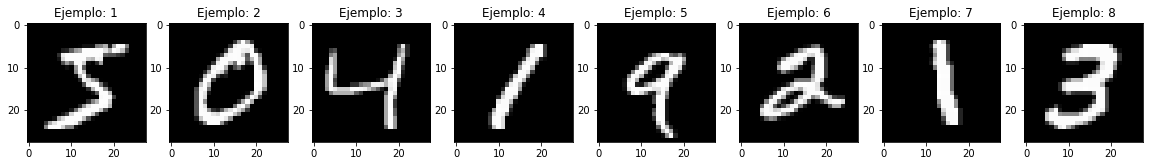

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for index, digit in zip(range(1, 9), mnist.data[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(np.reshape(digit, (28,28)), cmap=plt.cm.gray)
    plt.title('Ejemplo: ' + str(index))
plt.show()

# 3. División del conjunto de datos

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3)

In [13]:
print(len(X_train))
print(len(X_test))

49000
21000


# 4. Entrenamiento del algoritmo

In [39]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(75,), activation='logistic', solver='sgd')
clf.fit(X_train, y_train)

C:\Users\Mario\.conda\envs\deep_learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(75,), solver='sgd')

In [40]:
# Número de capas del perceptrón multicapa
clf.n_layers_

3

In [41]:
# Número de outputs del perceptrón multicapa
clf.n_outputs_

10

In [42]:
# Número de parámetros que forman el modelo
clf.coefs_

[array([[ 0.00047402,  0.00499621,  0.01327057, ..., -0.00694258,
         -0.04198659, -0.02424253],
        [-0.01913154, -0.01440758, -0.00559659, ..., -0.03913626,
         -0.02741026,  0.01962205],
        [-0.03063706, -0.04045   , -0.0181923 , ...,  0.01492346,
          0.04279471,  0.04819299],
        ...,
        [-0.02602051, -0.03512045,  0.0036859 , ..., -0.01499824,
         -0.01381751, -0.00021777],
        [ 0.03070381, -0.0281699 , -0.0002936 , ...,  0.01279669,
          0.02346749,  0.03225734],
        [-0.03474221,  0.00242845, -0.04343872, ..., -0.04659981,
         -0.0475942 ,  0.01078393]]),
 array([[ 5.77971741e-01,  4.44315577e-01, -3.53968153e-01,
         -5.78938854e-01, -2.60509081e-01,  1.94277215e-01,
         -2.27845837e-01,  1.84751537e-01,  3.21260605e-01,
         -1.60748312e-01],
        [-6.32447617e-01, -2.90912220e-01, -4.24665113e-01,
         -3.10600496e-02,  6.97680925e-01,  4.45716378e-01,
          2.49823726e-01,  3.79656446e-01, -2.

In [43]:
# Dimesiones del primera capa (hidden layer)
clf.coefs_[0].shape

(784, 75)

In [44]:
# Dimensiones de la segunda capa (output layer)
clf.coefs_[1].shape

(75, 10)

In [45]:
# Parámetros bias/intercept que forman parte de cada capa de la red neuronal
clf.intercepts_[0].shape

(75,)

# 5. Predicción con el conjunto de pruebas

In [46]:
# Realizamos la predicción con el conjunto de datos de pruebas
y_pred = clf.predict(X_test)

In [47]:
# Mostramos el f1_score resultante de la clasificación
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average="weighted")

0.9488140348978256

## Volver a repetir el ejercicio pero aumentando el número de neuronas en el hidden layer

# 6. Mostrar las imagenes mal clasificadas

In [49]:
import numpy as np
import matplotlib.pyplot as plt

index = 0
index_errors = []

for label, predict in zip(y_test, y_pred):
    if label != predict:
        index_errors.append(index)
    index += 1

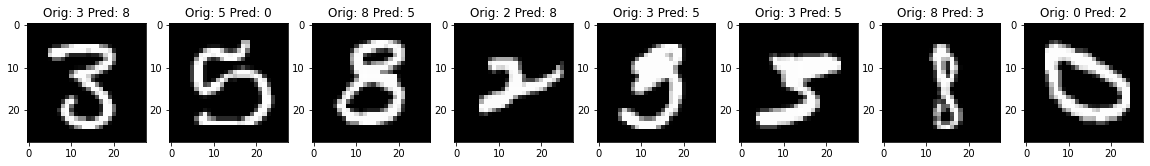

In [50]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for i, img_index in zip(range(1, 9), index_errors[8:16]):
    plt.subplot(1, 8, i)
    plt.imshow(np.reshape(X_test[img_index], (28, 28)), cmap=plt.cm.gray)
    plt.title('Orig: ' +str(y_test[img_index]) + ' Pred: ' + str(y_pred[img_index]))
plt.show()